In [2]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from mobile_sam import SamAutomaticMaskGenerator
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np


/Users/noahmac/Desktop/uni/kandidat/9_semester/ATIA/project/mobileSam_adapter/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/noahmac/Desktop/uni/kandidat/9_semester/ATIA/project/mobileSam_adapter/.venv/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/noahmac/Desktop/uni/kandidat/9_semester/ATIA/project/mobileSam_adapter/.venv/lib/python3.11/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureW

In [14]:
import os
import shutil
import random

# Parameters
task = "cod"  # replace with your task folder name
train_dir = f"./data/{task}/train"
val_dir = f"./data/{task}/val"
val_split = 0.2  # 20% of training data for validation

# Paths
train_images_dir = os.path.join(train_dir, "images")
train_masks_dir = os.path.join(train_dir, "masks")
val_images_dir = os.path.join(val_dir, "images")
val_masks_dir = os.path.join(val_dir, "masks")

# Create validation directories if they don't exist
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_masks_dir, exist_ok=True)

# List all images
all_images = sorted([f for f in os.listdir(train_images_dir) if f.endswith(".jpg")])
num_val = int(len(all_images) * val_split)

# Randomly select validation images
val_images = random.sample(all_images, num_val)

# Move images and corresponding masks
for img_name in val_images:
    # Move image
    shutil.move(os.path.join(train_images_dir, img_name),
                os.path.join(val_images_dir, img_name))
    
    # Construct corresponding mask filename
    mask_name = os.path.splitext(img_name)[0] + ".png"
    
    # Move mask
    shutil.move(os.path.join(train_masks_dir, mask_name),
                os.path.join(val_masks_dir, mask_name))

print(f"Moved {num_val} samples to validation set.")

Moved 1200 samples to validation set.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_training(path):
    df = pd.read_csv(path)

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Loss curves
    ax1.plot(df["epoch"], df["train_loss"], label="Train Loss", color="tab:blue", marker='o')
    ax1.plot(df["epoch"], df["val_loss"], label="Validation Loss", color="tab:orange", marker='s')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.grid(True, linestyle='--', alpha=0.5)

    # # Learning rate on secondary axis
    # ax2 = ax1.twinx()
    # ax2.plot(df["epoch"], df["lr"], color="tab:green", linestyle='--', label="Learning Rate")
    # ax2.set_ylabel("Learning Rate")
    # ax2.legend(loc="upper left")

    plt.title("Training/Validation Loss and Learning Rate")
    plt.tight_layout()
    plt.show()

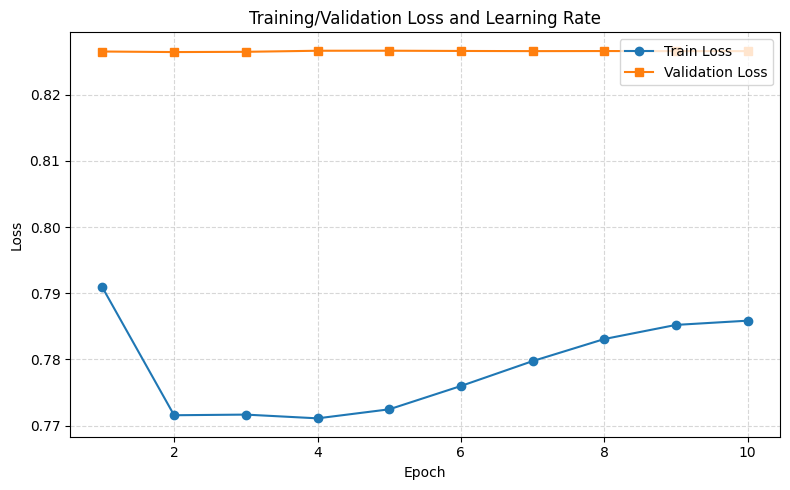

In [25]:
# Load CSV file
path = "./checkpoints/adapter/cod/2025-10-07_20-17-05/training_log.csv"
plot_training(path)

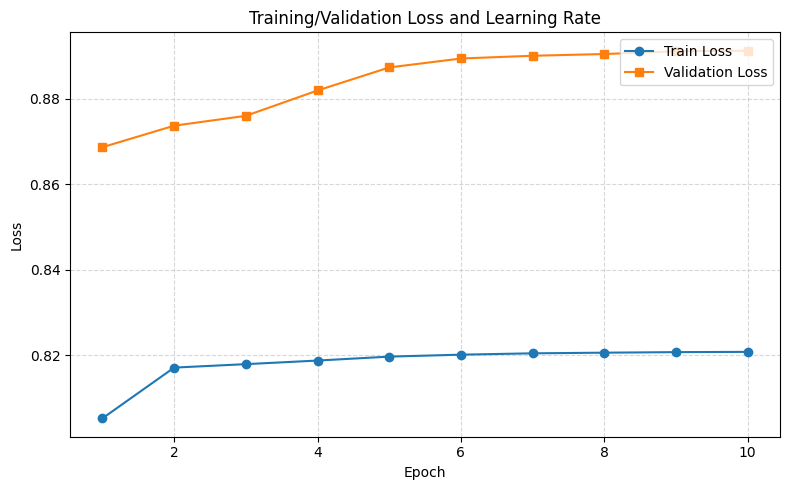

In [26]:
path = "./checkpoints/lora/cod/2025-10-08_16-21-10/training_log.csv"
plot_training(path)

In [2]:
model_type = "vit_t"
sam_checkpoint = "./MobileSam/weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

# predictor = SamPredictor(mobile_sam)
# predictor.set_image(<your_image>)
# masks, _, _ = predictor.predict(<input_prompts>)

LR SCALES: [0.08589934592000005, 0.10737418240000006, 0.13421772800000006, 0.1677721600000001, 0.20971520000000007, 0.2621440000000001, 0.3276800000000001, 0.4096000000000001, 0.5120000000000001, 0.6400000000000001, 0.8, 1.0]


Sam(
  (image_encoder): TinyViT(
    (patch_embed): PatchEmbed(
      (seq): Sequential(
        (0): Conv2d_BN(
          (c): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Conv2d_BN(
          (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (layers): ModuleList(
      (0): ConvLayer(
        (blocks): ModuleList(
          (0-1): 2 x MBConv(
            (conv1): Conv2d_BN(
              (c): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (act1): GELU(approximate='none')
            (conv2): Conv2d_BN(
 

In [16]:
import glob
from PIL import Image

img_path = "./data/cod/train/images/*"

sizes = set()

for img_file in glob.glob(img_path):
    with Image.open(img_file) as img:
        sizes.add(img.size)  # (width, height)

print("Unique image sizes:")
for s in sorted(sizes):
    print(s)

Unique image sizes:
(220, 330)
(253, 450)
(300, 199)
(333, 499)
(343, 600)
(357, 637)
(358, 684)
(360, 480)
(360, 640)
(361, 640)
(384, 500)
(396, 533)
(400, 800)
(412, 549)
(424, 620)
(425, 640)
(426, 639)
(426, 640)
(426, 650)
(427, 640)
(428, 640)
(440, 640)
(443, 800)
(446, 640)
(449, 799)
(449, 800)
(450, 271)
(450, 600)
(450, 799)
(451, 800)
(455, 640)
(459, 639)
(465, 671)
(470, 688)
(475, 640)
(479, 720)
(480, 480)
(480, 570)
(480, 640)
(480, 720)
(481, 640)
(481, 720)
(482, 720)
(488, 968)
(489, 640)
(495, 720)
(495, 746)
(498, 1024)
(499, 332)
(499, 333)
(500, 331)
(500, 333)
(500, 334)
(500, 374)
(500, 375)
(500, 378)
(500, 750)
(500, 800)
(506, 640)
(508, 800)
(510, 739)
(512, 768)
(513, 768)
(516, 856)
(519, 800)
(523, 640)
(525, 800)
(528, 800)
(529, 549)
(529, 800)
(530, 783)
(530, 800)
(531, 800)
(532, 416)
(532, 640)
(532, 799)
(532, 800)
(533, 799)
(533, 800)
(534, 799)
(534, 800)
(535, 800)
(536, 799)
(536, 800)
(537, 799)
(537, 800)
(539, 1024)
(540, 720)
(544, 800)

(600, 800, 3)


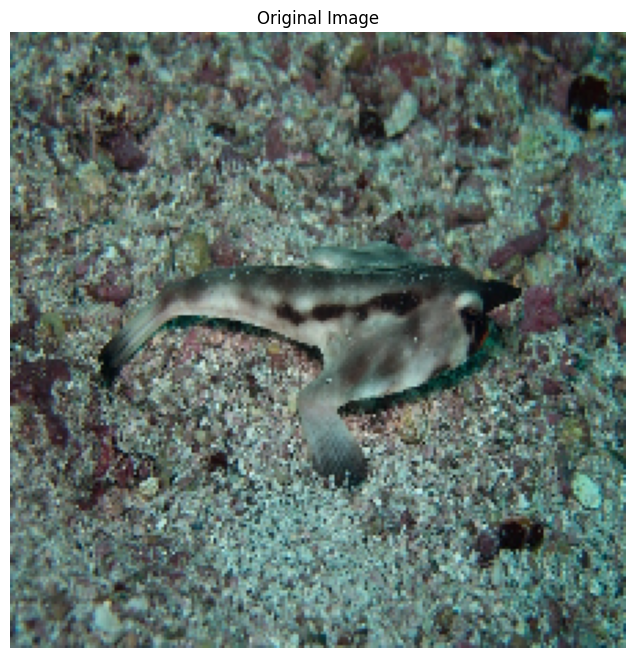

In [15]:
img_path = "./data/cod/train/images/COD10K-CAM-1-Aquatic-1-BatFish-1.jpg"

image_bgr = cv2.imread(img_path)

# 2. Convert BGR -> RGB for SAM
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (224, 224))

print(image_rgb.shape)

# 3. Display original image
plt.figure(figsize=(8, 8))
plt.imshow(image_resized)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [4]:
mask_generator = SamAutomaticMaskGenerator(mobile_sam)
masks = mask_generator.generate(image_rgb)

In [5]:
len(masks)

79

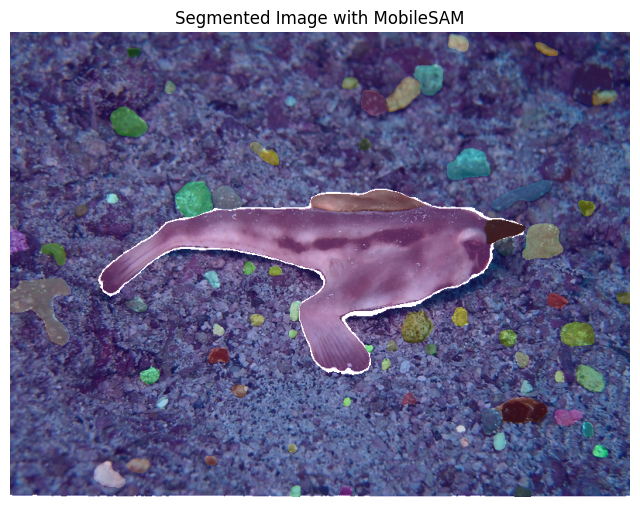

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0],
                   sorted_anns[0]['segmentation'].shape[1], 4))
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
show_anns(masks)
plt.axis("off")
plt.title("Segmented Image with MobileSAM")
plt.show()

In [7]:
# Load ground truth mask (white=object, black=background)
gt_mask = cv2.imread("./data/COD10K-v3/Train/GT_Object/COD10K-CAM-1-Aquatic-1-BatFish-1.png", cv2.IMREAD_GRAYSCALE)
gt_mask = (gt_mask > 127).astype(np.uint8)  # binarize (0 or 1)

def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    if union == 0:
        return 0.0
    return intersection / union

In [8]:
best_mask = None
best_iou = -1

for m in masks:
    pred_mask = m['segmentation']
    iou = compute_iou(pred_mask, gt_mask)
    if iou > best_iou:
        best_iou = iou
        best_mask = pred_mask

print("Best IoU:", best_iou)

Best IoU: 0.9622425160735493


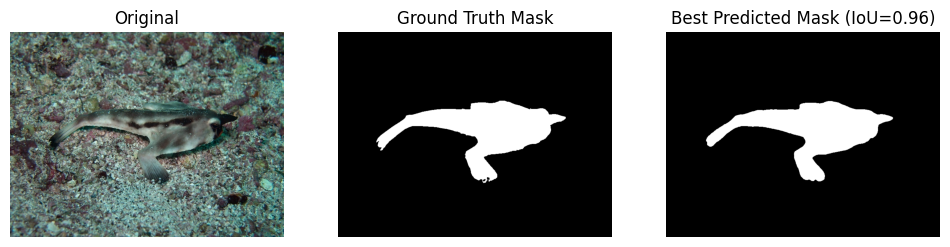

In [9]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gt_mask, cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(best_mask, cmap="gray")
plt.title(f"Best Predicted Mask (IoU={best_iou:.2f})")
plt.axis("off")

plt.show()